**BUILD MACHINE LEARNING MODEL FOR BUSSINES OPTIMIZATION**

# **IMPORT LIBRARY**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **IMPORT DATASET**

In [ ]:
url = 'https://drive.google.com/uc?id=1RzXAYuvUgySmJ5IQxJDhGwjqRCIy8zt8'
df = pd.read_csv(url)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             621 non-null    object 
 1   birth_date          572 non-null    object 
 2   phone_number        569 non-null    float64
 3   gender              608 non-null    object 
 4   married             618 non-null    object 
 5   dependents          605 non-null    object 
 6   education           620 non-null    object 
 7   self_employed       588 non-null    object 
 8   applicant_income    612 non-null    float64
 9   coapplicant_income  621 non-null    float64
 10  loan_amount         621 non-null    int64  
 11  loan_term_month     621 non-null    int64  
 12  loan_term_year      621 non-null    int64  
 13  credit_history      570 non-null    float64
 14  has_credit_card     88 non-null     object 
 15  property_type       620 non-null    object 
 16  loan_sta

# **Handling Missing Value**

In [ ]:
df.isnull().sum()

loan_id                 0
birth_date             49
phone_number           52
gender                 13
married                 3
dependents             16
education               1
self_employed          33
applicant_income        9
coapplicant_income      0
loan_amount             0
loan_term_month         0
loan_term_year          0
credit_history         51
has_credit_card       533
property_type           1
loan_status             0
dtype: int64

In [ ]:
df['birth_date'] = pd.to_datetime(df['birth_date'])

In [ ]:
df['phone_number'] = df['phone_number'].astype(str)

In [ ]:
df.drop('has_credit_card', axis=1, inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

loan_id               0
birth_date            0
phone_number          0
gender                0
married               0
dependents            0
education             0
self_employed         0
applicant_income      0
coapplicant_income    0
loan_amount           0
loan_term_month       0
loan_term_year        0
credit_history        0
property_type         0
loan_status           0
dtype: int64

# **Handling Duplicated Data**

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.head()

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status
0,LP001002,1977-05-15,628114203187.0,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,house,APPROVE
1,LP001003,1979-08-24,628776449212.0,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,studio,REJECT
2,LP001005,1991-03-28,628119240537.0,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,house,APPROVE
3,LP001006,1980-06-02,62856343702.0,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,house,APPROVE
4,LP001008,1989-05-19,628113008687.0,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,house,APPROVE


# **Handling Outlier**

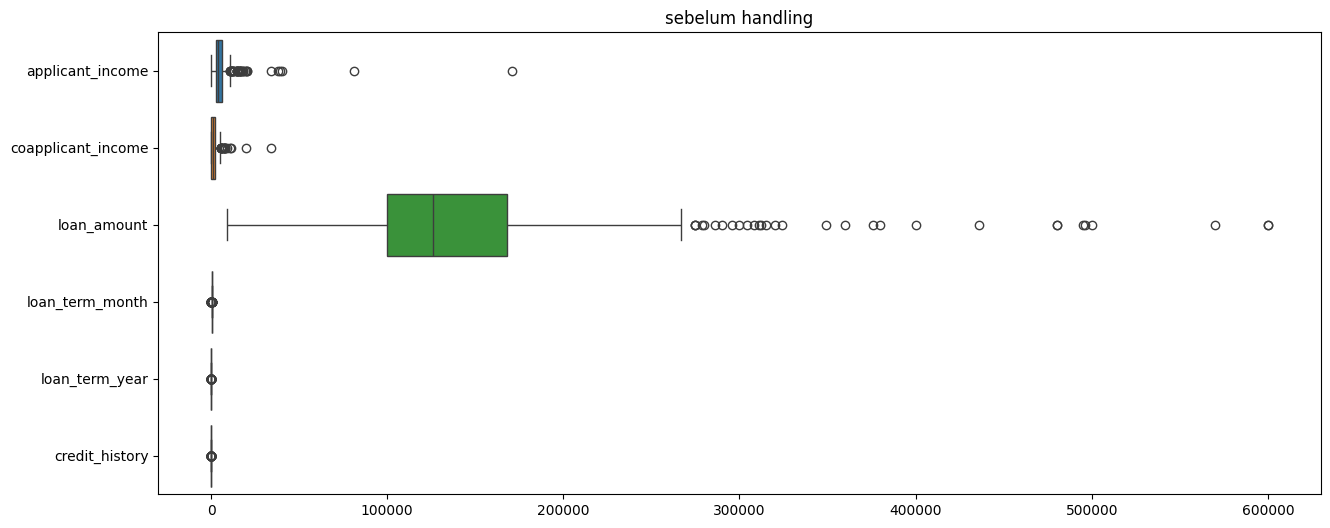

In [ ]:
numeric_columns = ['applicant_income', 'coapplicant_income', 'loan_amount', 'loan_term_month', 'loan_term_year', 'credit_history']

plt.figure(figsize=(15, 6))

sns.boxplot(data=df[numeric_columns], orient='h')

plt.title('sebelum handling')
plt.show()

In [ ]:
def detect_outliers_iqr(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    outliers = data[(data <= lower_limit) & (data >= upper_limit)]
    return outliers

for col in numeric_columns:
    outliers = detect_outliers_iqr(df[col])
    print(f"Outliers in column '{col}': {outliers.tolist()}")

Outliers in column 'applicant_income': []
Outliers in column 'coapplicant_income': []
Outliers in column 'loan_amount': []
Outliers in column 'loan_term_month': [360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360

# **FEATURE ENCODING**

In [ ]:
df.head(10)

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status
0,LP001002,1977-05-15,628114203187.0,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,house,APPROVE
1,LP001003,1979-08-24,628776449212.0,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,studio,REJECT
2,LP001005,1991-03-28,628119240537.0,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,house,APPROVE
3,LP001006,1980-06-02,62856343702.0,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,house,APPROVE
4,LP001008,1989-05-19,628113008687.0,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,house,APPROVE
5,LP001011,1986-01-22,62811028825.0,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267000,360,30,1.0,house,APPROVE
6,LP001013,1979-06-16,628111840127.0,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95000,360,30,1.0,house,APPROVE
7,LP001014,1999-05-21,628567566695.0,Male,Yes,3+,Graduate,No,3036.0,2504.0,158000,360,30,0.0,apartment,REJECT
8,LP001018,1987-08-25,628528959314.0,Male,Yes,2,Graduate,No,4006.0,1526.0,168000,360,30,1.0,house,APPROVE
9,LP001020,1983-12-13,628118659695.0,Male,Yes,1,Graduate,No,12841.0,10968.0,349000,360,30,1.0,apartment,REJECT


In [ ]:
df1 = df.copy()

In [ ]:
cats = ['gender', 'married', 'dependents', 'education', 'self_employed', 'property_type']
for i in cats:
  print('Kolom', i, df1[i].unique())

Kolom gender ['Male' 'Female']
Kolom married ['No' 'Yes']
Kolom dependents ['0' '1' '2' '3+']
Kolom education ['Graduate' 'Not Graduate']
Kolom self_employed ['No' 'Yes']
Kolom property_type ['house' 'studio' 'apartment']


In [ ]:
mapping_gender ={
    'Male' : 0,
    'Female' : 1
}
mapping_married ={
    'No' : 0,
    'Yes' : 1
}
mapping_dependents ={
    '0' : 0,
    '1' : 1,
    '2' : 2,
    '3' : 3
}
mapping_education ={
    'Graduate' : 0,
    'Not Graduate' : 1
}
mapping_self_employed ={
    'No' : 0,
    'Yes' : 1
}
mapping_property_type ={
    'house' : 0,
    'studio' : 1,
    'apartment' :2
}

df1['gender'] = df1['gender'].map(mapping_gender)
df1['married'] = df1['married'].map(mapping_married)
df1['dependents'] = df1['dependents'].map(mapping_dependents)
df1['education'] = df1['education'].map(mapping_education)
df1['self_employed'] = df1['self_employed'].map(mapping_self_employed)
df1['property_type'] = df1['property_type'].map(mapping_property_type)
df1

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status
0,LP001002,1977-05-15,628114203187.0,0,0,0.0,0,0,5849.0,0.0,100000,360,30,1.0,0,APPROVE
1,LP001003,1979-08-24,628776449212.0,0,1,1.0,0,0,4583.0,1508.0,128000,360,30,1.0,1,REJECT
2,LP001005,1991-03-28,628119240537.0,0,1,0.0,0,1,3000.0,0.0,66000,360,30,1.0,0,APPROVE
3,LP001006,1980-06-02,62856343702.0,0,1,0.0,1,0,2583.0,2358.0,120000,360,30,1.0,0,APPROVE
4,LP001008,1989-05-19,628113008687.0,0,0,0.0,0,0,6000.0,0.0,141000,360,30,1.0,0,APPROVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,LP002974,1988-03-24,628573921780.0,0,1,0.0,0,0,3232.0,1950.0,108000,360,30,1.0,1,APPROVE
616,LP002978,1976-03-25,628564969545.0,1,0,0.0,0,0,2900.0,0.0,71000,360,30,1.0,1,APPROVE
617,LP002979,1987-01-26,628116531578.0,0,1,NaN,0,0,4106.0,0.0,40000,180,15,1.0,1,APPROVE
618,LP002983,1982-03-08,628115828430.0,0,1,1.0,0,0,8072.0,240.0,253000,360,30,1.0,0,APPROVE


# **BUSSINESS INSIGHT**

In [ ]:
df_gr1 = df.groupby(['gender', 'property_type'])['loan_id'].count().reset_index()
df_gr1


,gender,property_type,loan_id
0,Female,apartment,41
1,Female,house,23
2,Female,studio,18
3,Male,apartment,142
4,Male,house,127
5,Male,studio,116


In [ ]:
df_gr1.columns = ['gender', 'property_type', 'count']

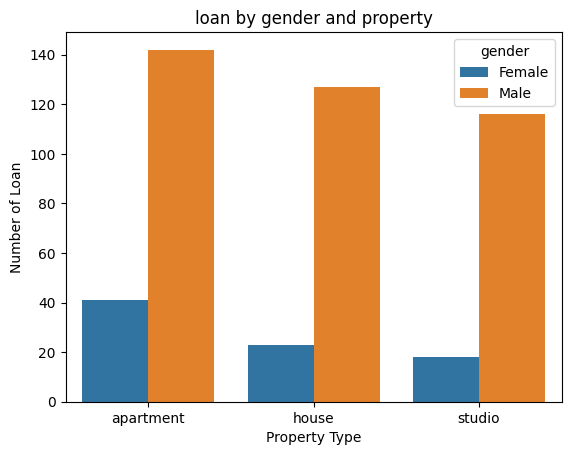

In [ ]:
sns.barplot(x="property_type", y="count", hue="gender", data=df_gr1)

plt.xlabel("Property Type")
plt.ylabel("Number of Loan")
plt.title("loan by gender and property")
plt.show()

# **PENGARUH PERKAWINAN TERHADAP JANGKA PINJAM**

In [ ]:
df_gr2 = df.groupby(['married', 'loan_term_year'])['loan_id'].count().reset_index()
df_gr2.columns = ['married', 'loan_term_year', 'number_of_applicant']
df_gr2


,married,loan_term_year,number_of_applicant
0,No,3,2
1,No,5,1
2,No,10,1
3,No,15,4
4,No,25,3
5,No,30,150
6,No,40,6
7,Yes,5,1
8,Yes,7,3
9,Yes,10,2


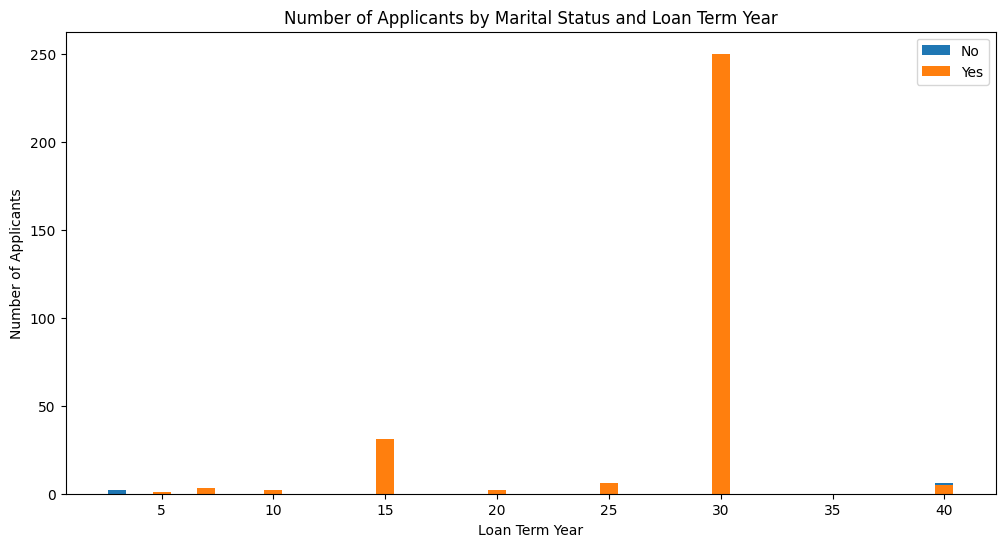

In [ ]:
plt.figure(figsize=(12, 6))
for married_status in df_gr2['married'].unique():
    plt.bar(df_gr2[df_gr2['married'] == married_status]['loan_term_year'],
            df_gr2[df_gr2['married'] == married_status]['number_of_applicant'],
            label=married_status)
plt.xlabel('Loan Term Year')
plt.ylabel('Number of Applicants')
plt.title('Number of Applicants by Marital Status and Loan Term Year')
plt.legend()
plt.show()

In [ ]:
numerical =['applicant_income', 'coapplicant_income', 'loan_amount', 'loan_term_month', 'loan_term_year']
categorical = ['gender', 'married', 'dependents', 'education', 'self_employed']

In [ ]:
df[numerical].describe()

,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year
count,467.000000,467.000000,467.000000,467.000000,467.000000
mean,5799.411135,1514.567280,144890.792291,341.678801,28.473233
std,9565.648233,2489.854169,80770.902507,65.317380,5.443115
min,150.000000,0.000000,9000.000000,36.000000,3.000000
25%,2917.000000,0.000000,100000.000000,360.000000,30.000000
50%,3867.000000,1030.000000,126000.000000,360.000000,30.000000
75%,6000.000000,2241.000000,168000.000000,360.000000,30.000000
max,170578.000000,33837.000000,600000.000000,480.000000,40.000000
